#**ONCODE Masterclass: Introduction to machine learning in cancer genomics**
##November 18th, 2020
##**Deep Learning 1: Image Classification with a Convolutional Neural Network (CNN)**

<img src='https://drive.google.com/uc?id=1gQU3ywndM16loOCb4k4AGklgXu0-yBwv'>

The data and methodology used in this tutorial are based on the following publication:


Araújo T, Aresta G, Castro E, Rouco J, Aguiar P, Eloy C, et al. (2017) Classification of breast cancer histology images using Convolutional Neural Networks. PLoS ONE 12(6): e0177544. https://doi.org/10.1371/journal.pone.0177544


##Introduction for absolute beginners: main concepts in Deep Learning
Deep Learning is a class of machine learning algorithms inspired by the structure and function of the brain. At the basic level is the perceptron, the mathematical representation of a biological neuron. Just like in the human cortex, there can be several layers of interconnected perceptrons. Input values get passed through this “network” of hidden layers until they eventually converge to the output layer.
<center> 
<img src='https://drive.google.com/uc?id=1YKTC1-wasZywRT6hXCLyBMw8qgrKXRHf' width="450" height="220"/>
</center>

**Weights** and **biases** are learned parameters of a perceptron model. Weights control the signal (or the strength of the connection) between two neurons.  In other words, a weight decides how much influence the input will have on the output.
Biases, which are constant, are an additional input into the next layer that will always have the value of 1.  Bias units are not influenced by the previous layer (they do not have any incoming connections) but they do have outgoing connections with their own weights.  The bias unit guarantees that even when all the inputs are zeros there will still be an activation in the neuron.
An **activation function** (sigmoid on the above figure) acts as a mathematical ‘gateway’ which receives the input and calculates a weighted sum with added bias to determine if the node should fire or not. This allows some connections to become stronger, causing new connections to appear, or weaker, causing connections to be eliminated.
<center> 
<img src='https://drive.google.com/uc?id=1HYUFSGpX4pCMykKIq8p8-qyoseWk_yYl' width="430" height="220"/>
</center>

**How does the model learn weights and biases?**


**But why to choose Deep Learning instead of conventional machine learning algorithms?**

When dealing with large input data sizes with a long list of input values, machine learning algorithms typically require some feature selection prior to model training. The main advantage of deep learning models is that they do not necessarily need structured data and pre-obtained/selected features to classify the data. Deep learning models send the input through different layers of the network, with each network layer hierarchically defining specific features of the original input data.
<center> 
<img src='https://drive.google.com/uc?id=10mZ4aCmWrv56ymrPQI4llK_F4Nn3-JiX' width="490" height="300"/>
</center>

Moreover, deep learning models perform better in so-called 'big data' conditions, as they are well suited to learn complex feature patterns from large datasets and perform with higher accuracy on certain tasks (e.g.: image recognition/classification, speech recognition).

<center> 
<img src='https://drive.google.com/uc?id=12t2HoroX8Jf02a6IxsGzO-lzoWrpQ61T' width="450" height="300"/><br>copyright: Andrew Ng</br>
</center> 

## What are Convolutional Neural Networks (CNNs)?

D. H. Hubel and T. N. Wiesel proposed an explanation for the way in which mammals visually perceive the world around them using a layered architecture of neurons in the brain. In their hypothesis, within the visual cortex, complex functional responses generated by “complex cells” are constructed from more simplistic responses from “simple cells’. For instances, simple cells would respond to oriented edges etc, while complex cells will also respond to oriented edges but with a degree of spatial invariances.
<center> 
<img src='https://drive.google.com/uc?id=1026v3vAbACmAmCMIkVT8dh1AQY4t9UtT' width="720" height="240"/>
</center> 

This in turn inspired the architecture of deep convolutional neural networks, by the combination of **local connections, layering** and **spacial invariance (shifting the input signal)**.
Convolutional networks have been tremendously successful in practical applications where the input data has grid-like topology (e.g. images).
<center> 
<img src='https://drive.google.com/uc?id=189HShi0OjE2FXoxUdKdDsHS44YNG2_4S' width="720" height="320"/>
</center> 




## About our Breast cancer dataset


##Loading packages

In [2]:
import numpy as np
import pandas as pd
import os
from glob import glob
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import csv
from skimage.io import imread
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.utils import shuffle
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from imblearn.under_sampling import RandomUnderSampler
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense 
from keras.models import Sequential
from keras.utils import plot_model
from keras.preprocessing.image import ImageDataGenerator

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


##Exploring the dataset

First you need to mount the shared GDrive dataset before we load the files.
1. Go to the Shared Folder in your Google Drive (see link sent)
2. Right click on the folder (so you don't open it but you see a pop-up window with a list of actions), click on 'Add shortcut to Drive' (My Drive is selected by default so keep it that way).
3. Now you can run the mounting command section below: 

In [3]:
from google.colab import drive
drive.mount("/content/drive")
os.chdir("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The main data folder contains mutliple subfolders. There are **279 subfolders** and each subfolder contains several image patches for 1 patient. That's a rather small number compared to the expected number of patients one would like to use to build a robust model. *Consequently, overfitting to this specific patient distribution is very likely and we need to consider the generalization performance of our Deep Learning model.*



In [4]:
base_path = "/content/drive/My Drive/Colab Notebooks/data/IDC_regular_ps50_idx5.zip (Unzipped Files)/IDC_regular_ps50_idx5/"
import os
folder = os.listdir(base_path)
len(folder)
print(folder)
# check uploaded folders later - potentially re-upload with different zip

['8914', '8913', '9036', '10257', '10261', '10268', '10259', '10292', '10295', '13613', '12951', '15510', '16165']


**How many histology image patches do we have in total?**

Complete patient tissue slices are not available (and not necessary for classification) so the single patches have to be considered as input to our Deep Learning model. Therefore, the model needs to decide whether an image patch represents IDC or not. For each patient, we know if a given patch contains IDC, therefore our goal will be to decide about individual patches and not about patients. (Of course, we can still check how well we are able to classify patients with IDC, we'll get back to that in the end)

In [5]:
total_images = 0
filtered_folder = []
for n in range(len(folder)):
    patient_id = folder[n]
    for c in [0, 1]:
        patient_path = base_path + patient_id 
        class_path = patient_path + "/" + str(c) + "/"
        ### copy missing folders later
        if os.path.isdir(class_path):
            subfiles = os.listdir(class_path)
            total_images += len(subfiles)
            if patient_id not in filtered_folder:
                filtered_folder.append(patient_id)
total_images
print(total_images)
print(len(folder))
print(len(filtered_folder))

16316
13
13


Now we are going to store the path of each image. This way we can load batches of images only one by one without storing the pixel values of all images.

In [6]:
data = pd.DataFrame(index=np.arange(0, total_images), columns=["patient_id", "path", "target"])

k = 0
for n in range(len(filtered_folder)):
    patient_id = filtered_folder[n]
    patient_path = base_path + patient_id 
    for c in [0,1]:
        class_path = patient_path + "/" + str(c) + "/"
        subfiles = os.listdir(class_path)
        for m in range(len(subfiles)):
            image_path = subfiles[m]
            data.iloc[k]["path"] = class_path + image_path
            data.iloc[k]["target"] = c
            data.iloc[k]["patient_id"] = patient_id
            k += 1  

data.head()

,patient_id,path,target
0,8914,/content/drive/My Drive/Colab Notebooks/data/I...,0
1,8914,/content/drive/My Drive/Colab Notebooks/data/I...,0
2,8914,/content/drive/My Drive/Colab Notebooks/data/I...,0
3,8914,/content/drive/My Drive/Colab Notebooks/data/I...,0
4,8914,/content/drive/My Drive/Colab Notebooks/data/I...,0


**Descriptive statistics of IDC (+/-) image patches**


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


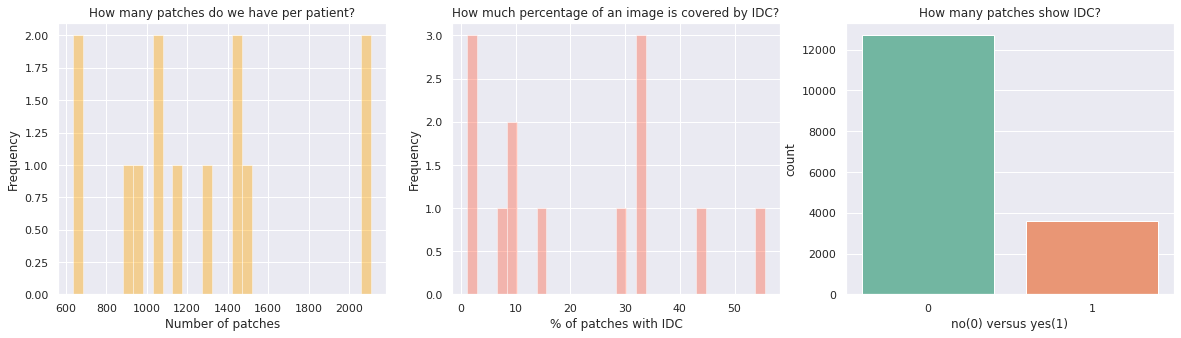

In [7]:
cancer_perc = data.groupby("patient_id").target.value_counts()/ data.groupby("patient_id").target.size()
cancer_perc = cancer_perc.unstack()

fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.distplot(data.groupby("patient_id").size(), ax=ax[0], color="Orange", kde=False, bins=30)
ax[0].set_xlabel("Number of patches")
ax[0].set_ylabel("Frequency");
ax[0].set_title("How many patches do we have per patient?");
sns.distplot(cancer_perc.loc[:, 1]*100, ax=ax[1], color="Tomato", kde=False, bins=30)
ax[1].set_title("How much percentage of an image is covered by IDC?")
ax[1].set_ylabel("Frequency")
ax[1].set_xlabel("% of patches with IDC");
sns.countplot(data.target, palette="Set2", ax=ax[2]);
ax[2].set_xlabel("no(0) versus yes(1)")
ax[2].set_title("How many patches show IDC?");

1. The number of image patches per patient varies a lot! This leads to the questions whether all images show the same resolution of tissue cells of if this varies between patients.

2. Some patients have more than 80 % patches that show IDC! Consequently the tissue is full of cancer or only a part of the breast was covered by the tissue slice that is focused on the IDC cancer. Does a tissue slice per patient cover the whole region of interest?

3. The classes of IDC versus no IDC are imbalanced. We have to check this again after setting up a validation strategy and find a strategy to deal with class weights (if we like to apply them).

In [8]:
data.target = data.target.astype(np.int)
pos_selection = np.random.choice(data[data.target==1].index.values, size=50, replace=False)
neg_selection = np.random.choice(data[data.target==0].index.values, size=50, replace=False)

**IDC(+) image patches**

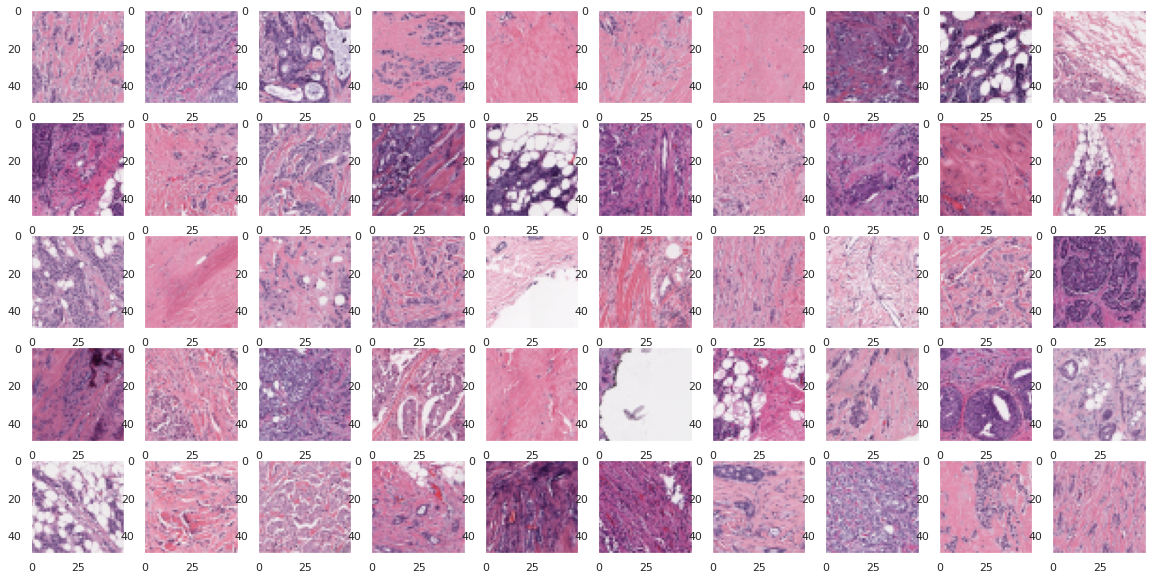

In [10]:
fig, ax = plt.subplots(5,10,figsize=(20,10))

for n in range(5):
    for m in range(10):
        idx = pos_selection[m + 10*n]
        filename = data.loc[idx, "path"]
        if filename.endswith('.png'):
            try:
                img = Image.open(filename) # open the image file
                img.verify() # verify that it is, in fact an image
                image = imread(data.loc[idx, "path"])
                ax[n,m].imshow(image)
                ax[n,m].grid(False)
            except (IOError, SyntaxError) as e:
                pass
                #print('Bad file:', filename)
                #os.remove(base_dir+"\\"+filename) (Maybe)
plt.show()

**IDC(-) image patches**

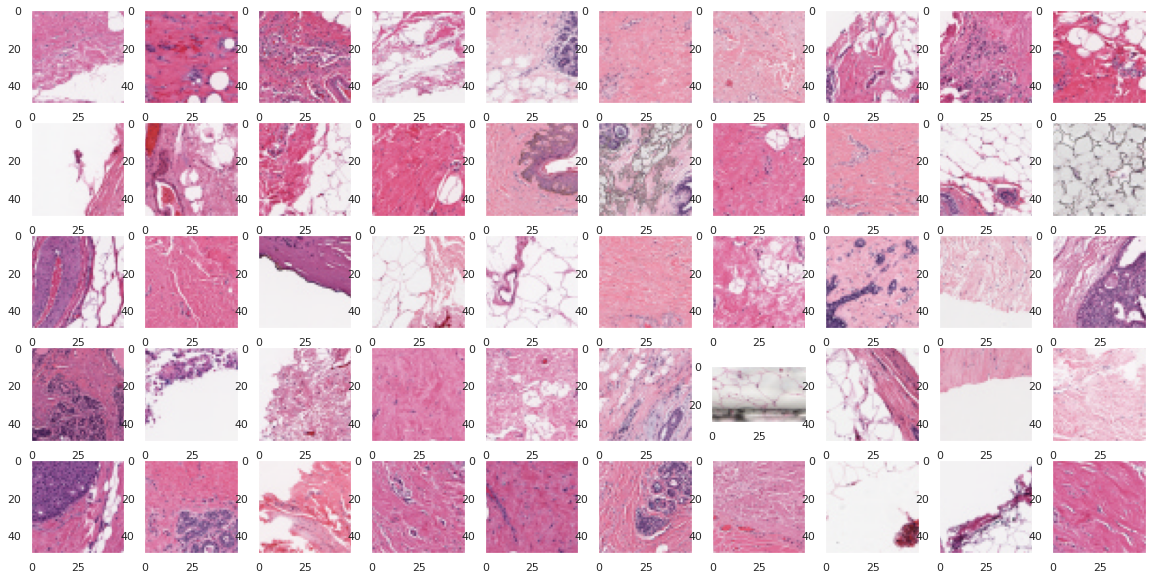

In [11]:
fig, ax = plt.subplots(5,10,figsize=(20,10))

for n in range(5):
    for m in range(10):
        idx = neg_selection[m + 10*n]
        image = imread(data.loc[idx, "path"])
        ax[n,m].imshow(image)
        ax[n,m].grid(False)
plt.show()

**Visualising the whole available breast tissue per patient**

This part is a bit tricky as we have to extract all coordinates of image patches that are stored in the image names. Then we can use the coordinates to reconstruct the whole breast tissue of a patient. This way we can also explore how diseased tissue looks like compared to healthy ones. To simplify this task let's write a method that takes a patient and outcomes a dataframe with coordinates and targets.

In [17]:
def extract_coords(df):
    coord = df.path.str.rsplit("_", n=4, expand=True)
    coord = coord.drop([0, 1, 4], axis=1)
    coord = coord.rename({2: "x", 3: "y"}, axis=1)
    coord.loc[:, "x"] = coord.loc[:,"x"].str.replace("x", "", case=False).astype(np.int)
    coord.loc[:, "y"] = coord.loc[:,"y"].str.replace("y", "", case=False).astype(np.int)
    df.loc[:, "x"] = coord.x.values
    df.loc[:, "y"] = coord.y.values
    return df

def get_cancer_dataframe(patient_id, cancer_id):
    path = base_path + patient_id + "/" + cancer_id
    files = os.listdir(path)
    dataframe = pd.DataFrame(files, columns=["filename"])
    path_names = path + "/" + dataframe.filename.values
    dataframe = dataframe.filename.str.rsplit("_", n=4, expand=True)
    dataframe.loc[:, "target"] = np.int(cancer_id)
    dataframe.loc[:, "path"] = path_names
    dataframe = dataframe.drop([0, 1, 4], axis=1)
    dataframe = dataframe.rename({2: "x", 3: "y"}, axis=1)
    dataframe.loc[:, "x"] = dataframe.loc[:,"x"].str.replace("x", "", case=False).astype(np.int)
    dataframe.loc[:, "y"] = dataframe.loc[:,"y"].str.replace("y", "", case=False).astype(np.int)
    return dataframe

def get_patient_dataframe(patient_id):
    df_0 = get_cancer_dataframe(patient_id, "0")
    df_1 = get_cancer_dataframe(patient_id, "1")
    patient_df = df_0.append(df_1)
    return patient_df

In [18]:
example = get_patient_dataframe(data.patient_id.values[0])
example.head()

,x,y,target,path
0,651,1251,0,/content/drive/My Drive/Colab Notebooks/data/I...
1,2501,2251,0,/content/drive/My Drive/Colab Notebooks/data/I...
2,701,1101,0,/content/drive/My Drive/Colab Notebooks/data/I...
3,801,551,0,/content/drive/My Drive/Colab Notebooks/data/I...
4,2351,2901,0,/content/drive/My Drive/Colab Notebooks/data/I...


Before we take a look at the whole tissue let's check the target IDC(+/-) structure in the x-y-space for a few patients, so we do a binary visualisation per tissue slice:

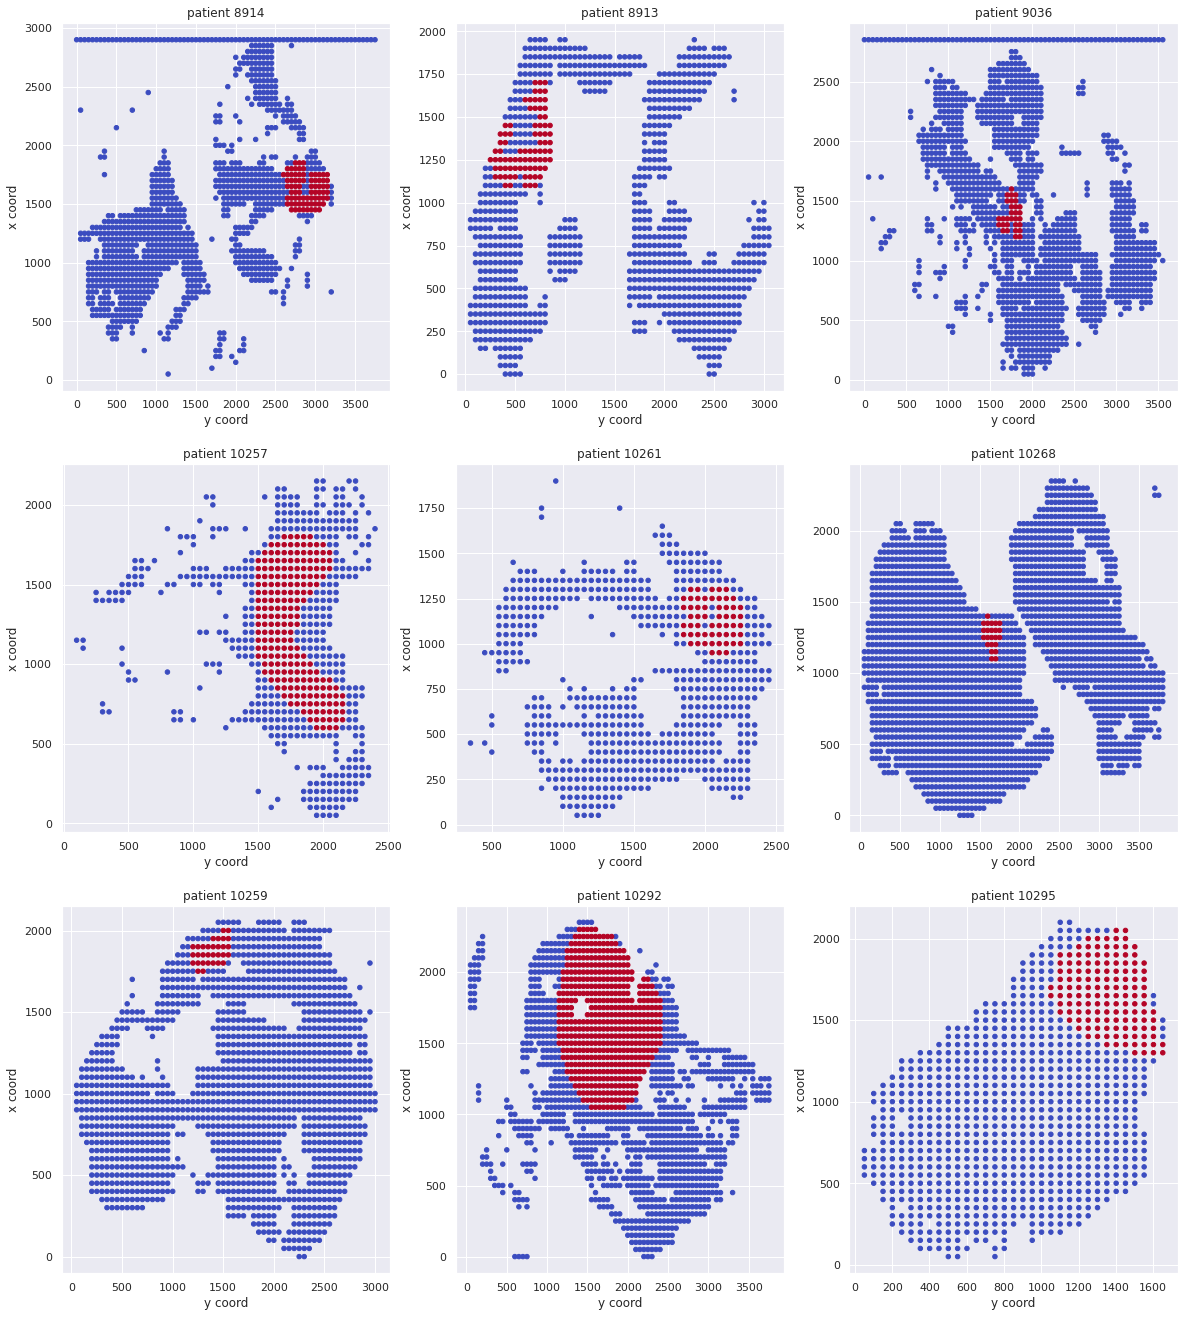

In [23]:
fig, ax = plt.subplots(3,3,figsize=(20, 23))

patient_ids = data.patient_id.unique()

for n in range(3):
    for m in range(3):
        patient_id = patient_ids[m + 3*n]
        example_df = get_patient_dataframe(patient_id)
        
        ax[n,m].scatter(example_df.x.values, example_df.y.values, c=example_df.target.values, cmap="coolwarm", s=20);
        ax[n,m].set_title("patient " + patient_id)
        ax[n,m].set_xlabel("y coord")
        ax[n,m].set_ylabel("x coord")

Sometimes we don't have the full tissue information. It seems that tissue patches have been discarded or lost during preparation.

Let's use an example patient with id 13616:

In [24]:
def visualise_breast_tissue(patient_id, pred_df=None):
    example_df = get_patient_dataframe(patient_id)
    max_point = [example_df.y.max()-1, example_df.x.max()-1]
    grid = 255*np.ones(shape = (max_point[0] + 50, max_point[1] + 50, 3)).astype(np.uint8)
    mask = 255*np.ones(shape = (max_point[0] + 50, max_point[1] + 50, 3)).astype(np.uint8)
    if pred_df is not None:
        patient_df = pred_df[pred_df.patient_id == patient_id].copy()
    mask_proba = np.zeros(shape = (max_point[0] + 50, max_point[1] + 50, 1)).astype(np.float)
    
    broken_patches = []
    for n in range(len(example_df)):
        try:
            image = imread(example_df.path.values[n])
            
            target = example_df.target.values[n]
            
            x_coord = np.int(example_df.x.values[n])
            y_coord = np.int(example_df.y.values[n])
            x_start = x_coord - 1
            y_start = y_coord - 1
            x_end = x_start + 50
            y_end = y_start + 50

            grid[y_start:y_end, x_start:x_end] = image
            if target == 1:
                mask[y_start:y_end, x_start:x_end, 0] = 250
                mask[y_start:y_end, x_start:x_end, 1] = 0
                mask[y_start:y_end, x_start:x_end, 2] = 0
            if pred_df is not None:
                
                proba = patient_df[
                    (patient_df.x==x_coord) & (patient_df.y==y_coord)].proba
                mask_proba[y_start:y_end, x_start:x_end, 0] = np.float(proba)

        except ValueError:
            broken_patches.append(example_df.path.values[n])
    
    
    return grid, mask, broken_patches, mask_proba

In [ ]:
example = "9036"
grid, mask, broken_patches,_ = visualise_breast_tissue(example)

fig, ax = plt.subplots(1,2,figsize=(20,10))
ax[0].imshow(grid, alpha=0.9)
ax[1].imshow(mask, alpha=0.8)
ax[1].imshow(grid, alpha=0.7)
ax[0].grid(False)
ax[1].grid(False)
for m in range(2):
    ax[m].set_xlabel("y-coord")
    ax[m].set_ylabel("y-coord")
ax[0].set_title("Breast tissue slice of patient: " + patient_id)
ax[1].set_title("Cancer tissue colored red \n of patient: " + patient_id);

## Split the dataset into training and test sets

In [ ]:
X=np.array(X)
X=X/255.0

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Reduce Sample Size for DeBugging
X_train = X_train[0:300000] 
Y_train = Y_train[0:300000]
X_test = X_test[0:300000] 
Y_test = Y_test[0:300000]

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

##Dealing with imbalanced labels

In [ ]:
# Deal with imbalanced class sizes below
# Make Data 1D for compatability upsampling methods
X_trainShape = X_train.shape[1]*X_train.shape[2]*X_train.shape[3]
X_testShape = X_test.shape[1]*X_test.shape[2]*X_test.shape[3]
X_trainFlat = X_train.reshape(X_train.shape[0], X_trainShape)
X_testFlat = X_test.reshape(X_test.shape[0], X_testShape)
#print("X_train Shape: ",X_train.shape)
#print("X_test Shape: ",X_test.shape)
#print("X_trainFlat Shape: ",X_trainFlat.shape)
#print("X_testFlat Shape: ",X_testFlat.shape)

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
#ros = RandomOverSampler(ratio='auto')
ros = RandomUnderSampler(ratio='auto')
X_trainRos, Y_trainRos = ros.fit_sample(X_trainFlat, Y_train)
X_testRos, Y_testRos = ros.fit_sample(X_testFlat, Y_test)

# Encode labels to hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_trainRosHot = to_categorical(Y_trainRos, num_classes = 2)
Y_testRosHot = to_categorical(Y_testRos, num_classes = 2)
#print("X_train: ", X_train.shape)
#print("X_trainFlat: ", X_trainFlat.shape)
#print("X_trainRos Shape: ",X_trainRos.shape)
#print("X_testRos Shape: ",X_testRos.shape)
#print("Y_trainRosHot Shape: ",Y_trainRosHot.shape)
#print("Y_testRosHot Shape: ",Y_testRosHot.shape)

for i in range(len(X_trainRos)):
    height, width, channels = 50,50,3
    X_trainRosReshaped = X_trainRos.reshape(len(X_trainRos),height,width,channels)
#print("X_trainRos Shape: ",X_trainRos.shape)
#print("X_trainRosReshaped Shape: ",X_trainRosReshaped.shape)

for i in range(len(X_testRos)):
    height, width, channels = 50,50,3
    X_testRosReshaped = X_testRos.reshape(len(X_testRos),height,width,channels)
#print("X_testRos Shape: ",X_testRos.shape)
#print("X_testRosReshaped Shape: ",X_testRosReshaped.shape)

dfRos = pd.DataFrame()
dfRos["labels"]=Y_trainRos
labRos = dfRos['labels']
distRos = lab.value_counts()
sns.countplot(labRos)
print(dict_characters)

##CNN model building